# Sulcal morphology pipeline

We want to measure morphological properties of small and variable sulci. To do so, we'll need to  
(1) process the raw T1 scan in FreeSurfer,  
(2) manually identify and label the sulci, and  
(3) use FreeSurfer to extract anatomical properties from our sulcal labels.

The full pipeline is outlined below:

<img src="https://raw.githubusercontent.com/smaboudian/sulcal-morph-demo/main/images/sulcmorph-pipeline.png" width="900" />


The first step is already completed (because it takes a few hours per scan): running the _recon-all_ command in FreeSurfer. 

FreeSurfer (FS) is an open-source software package for neuroimaging (structural MRI) analysis and visualization<sup>[1]</sup>. [_Recon-all_](https://surfer.nmr.mgh.harvard.edu/fswiki/recon-all) performs the FS cortical reconstruction process, which converts the 3D cortical volume into 2D surfaces that it uses to compute various anatomical properties (that we'll use in step 3)<sup>[2]</sup>. Here's an overview of the steps:


<img src="https://raw.githubusercontent.com/smaboudian/sulcal-morph-demo/main/images/FS_reconall.png" width="800" /> 

<img src="https://raw.githubusercontent.com/smaboudian/sulcal-morph-demo/main/images/FS_reconall-output.png" width="800" />

We'll be labeling sulci on the *inflated* surface, because the inflation allows us to see the sulci (in red). We use the *pial* (the one that looks like a regular brain) as a reference, because sometimes the inflated one distorts the way the sulci look.


# Labeling sulci

The next step is to manually identify and label the sulci. We first do this on screenshots of each hemisphere and then enter finalized labels into FS to extract morphological properties from each label.

For this demo, we'll be labeling sulci in medial parietal cortex (MPC). In this region, there are 7 primary/secondary sulci and 1-5 tertiary sulci:


<img src="https://raw.githubusercontent.com/smaboudian/sulcal-morph-demo/main/images/labels_inflated_pial.png" width="1000" />


There is considerable individual variability in the number and location of sulci: there are 8 sulci that will be present in all hemispheres ("consistent"), and 4 variable or "inconsistent" sulci that not every hemisphere will have:

<img src="https://raw.githubusercontent.com/smaboudian/sulcal-morph-demo/main/images/MPC_sulci.png" width="1000" />



Head to [this link](https://docs.google.com/presentation/d/1bP4_0ZPlcH8Zn5mYyScCcsP61hnBiWtJg36Zq9l0v6k/edit?usp=sharing) to see some examples of labeled hemispheres and atlases we use for reference. Pick a few slides each to label (directly on the slide).


Once we've labeled the sulci on the screenshots and confirmed they're correct, we can enter them into FS.   

Since you don't have access to the Neuro Cluster, this step has already been done for you. (if you want to see how we do it, instructions for entering sulcal labels into FS are [here](https://sites.google.com/view/cnl-wiki/home/how-tos/freesufer/labels-in-freesurfer?authuser=0); skip to step 5).   



# Extracting anatomical properties from sulcal labels & analyzing them

Running the [_mris_anatomical_stats_](https://surfer.nmr.mgh.harvard.edu/fswiki/mris_anatomical_stats) function in FS computes anatomical properties (surface area, gray matter volume, cortical thickness, etc.) for a set of labels (if specified), in this case the sulcal labels you just created. This can take some time, so you can skip this step for this demo. 

Now you can view the final output that contains the morphological metrics for the sulci you labeled. Run the code cells below to load in the data -- some basic plots and analyses are provided, but feel free to play around with it on your own too!




In [ ]:
## load packages ##
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load in your data: morphological metrics for your sulcal labels
url = 'https://raw.githubusercontent.com/smaboudian/sulcal-morph-demo/main/demo-30CN_MPC.csv'
df = pd.read_csv(url, converters={'item': eval})
df.head()

,group,sub,hemi,label,vertices,total_surface_area_(mm^2),total_gray_matter_volume_(mm^3),cortical_thickness_mean,cortical_thickness_std,rectified_mean_curvature,rectified_Gaussian_curvature,folding_index,intrinsic_curvature_index,sulcal_depth_mean,sulcal_depth_max,sulcal_depth_mean_pct,sulc_type,label_orig,sulcal_depth_mm,area
0,CN,007_S_4488,lh,pos,1764.0,1204.0,2277.0,2.232,0.342,0.111,0.022,9.0,1.7,5.188825,13.898811,0.309191,primary/secondary,POS,21.108100,PMC
1,CN,007_S_4488,lh,prculs,464.0,329.0,579.0,1.957,0.291,0.102,0.012,2.0,0.3,3.194825,10.882976,0.190373,primary/secondary,prculs,16.783466,PMC
2,CN,007_S_4488,lh,prcus-p,415.0,284.0,574.0,2.258,0.338,0.115,0.021,2.0,0.4,4.195996,9.133797,0.250030,primary/secondary,prcus1,12.845846,PMC
3,CN,007_S_4488,lh,prcus-i,306.0,227.0,364.0,1.857,0.335,0.134,0.019,3.0,0.3,-1.208224,2.093879,-0.071995,primary/secondary,prcus2,8.776521,PMC
4,CN,007_S_4488,lh,prcus-a,546.0,400.0,725.0,2.035,0.386,0.120,0.017,4.0,0.5,3.230111,8.453441,0.192475,primary/secondary,prcus3,11.436054,PMC


In [ ]:
# function to make violin plots, using Seaborn (just run this cell)

def violinplot(df, metric, metric_name):
    sulci = ['pos', 'prculs', 'prcus-p', 'prcus-i', 'prcus-a', 
             'spls', 'mcgs','sspls', 'ifrms', 'icgs-p']

    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
    fig.suptitle(metric_name+' by sulcal type and hemisphere');

    axes[0].set_title('left hem.')
    sns.violinplot(ax=axes[0],
                   x="label", y=metric, 
                   hue="sulc_type", order=sulci,
                   data=df[df['hemi']=='lh']);
    axes[1].set_title('right hem.')
    axes[1].set_ylabel('');
    sns.violinplot(ax=axes[1],
                   x="label", y=metric, 
                   hue="sulc_type", order=sulci,
                   data=df[df['hemi']=='rh']);


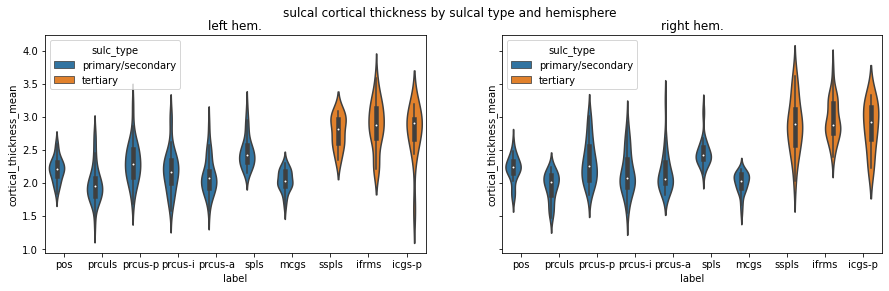

In [ ]:
# plot mean sulcal cortical thickness (in mm)
violinplot(df, 'cortical_thickness_mean', 'sulcal cortical thickness')

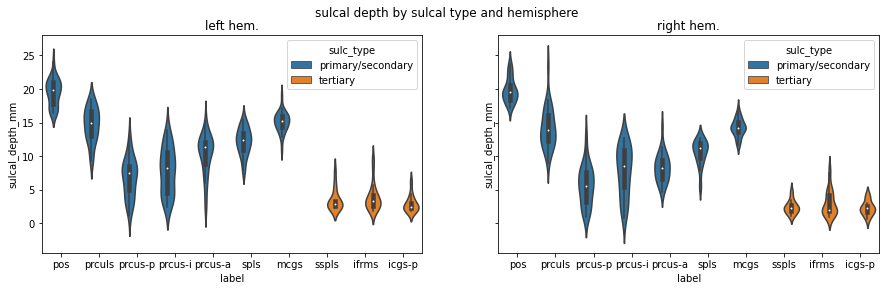

In [ ]:
# plot mean sulcal depth (in mm)
violinplot(df, 'sulcal_depth_mm', 'sulcal depth')

It looks like tertiary sulci are both thicker and less deep than primary & secondary sulci. Let's confirm that:

In [ ]:
## setup rpy2 ##
# run once; this will allow you to run R embedded in your Python notebook
%load_ext rpy2.ipython


In [ ]:
## import robjects ##
import tzlocal
import rpy2.robjects 
from rpy2.robjects import r

In [ ]:
#### import rpackages ####

# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f1e97b70e60> [RTYPES.NILSXP]

In [ ]:
%%R 
#^ runs R in this cell

# load packages
library(nlme)

# load data in R
url = 'https://raw.githubusercontent.com/smaboudian/sulcal-morph-demo/main/demo-30CN_MPC.csv'
df = read.csv(url)

# run models
model_CT <- lme(cortical_thickness_mean ~ hemi * sulc_type, random = ~ 1|sub/hemi/sulc_type,
               data = df)
model_CT.aov <- anova(model_CT)
cat('Cortical Thickness ANOVA:\n')
print(model_CT.aov)

model_SD <- lme(sulcal_depth_mm ~ hemi * sulc_type, random = ~ 1|sub/hemi/sulc_type,
               data = df)
model_SD.aov <- anova(model_SD)
cat('\nSulcal Depth ANOVA:\n')
print(model_SD.aov)

Cortical Thickness ANOVA:
               numDF denDF  F-value p-value
(Intercept)        1   469 9398.658  <.0001
hemi               1    29    0.698  0.4103
sulc_type          1    58  530.281  <.0001
hemi:sulc_type     1    58    2.133  0.1496

Sulcal Depth ANOVA:
               numDF denDF   F-value p-value
(Intercept)        1   469 3064.8245  <.0001
hemi               1    29    5.2709  0.0291
sulc_type          1    58  366.9125  <.0001
hemi:sulc_type     1    58    0.0398  0.8426


In [ ]:
# feel free to run your own analyses in the cells below!

# Resources:

1. FreeSurfer wiki: https://surfer.nmr.mgh.harvard.edu/fswiki
2. FreeSurfer tutorial slides used in this demo: https://surfer.nmr.mgh.harvard.edu/fswiki/Tutorials 
3. FreeSurfer tutorial: https://andysbrainbook.readthedocs.io/en/latest/FreeSurfer/FreeSurfer_Introduction.html
4. Example CNL papers: (Miller et al., J Neuro, 2021 https://www.jneurosci.org/content/41/10/2229; Voorhies et al., Nat Comm 2021 https://cnl.berkeley.edu/papers/Voorhies_NatureCommunications_2021.pdf)
5. Lab website: https://cnl.berkeley.edu/publications.html
6. Data used in this example, from the Alzheimer’s Disease Neuroimaging Initiative (ADNI): https://adni.loni.usc.edu/



# Transcriptomics pipeline

The goal of this tutorial is to evaluate how changes in gene expression for a certain subset of genes is associated with anatomical features of the adult cerebral cortex


Dataset #1 <br>
<img src="https://raw.githubusercontent.com/smaboudian/sulcal-morph-demo/main/images/ahba.png" width="600" />

Dataset #2
Dataset #1 <br>
<img src="https://raw.githubusercontent.com/smaboudian/sulcal-morph-demo/main/images/jubrain.png" width="600" />

In [ ]:
# Lets load the packages being used
#import numpy as np #already loaded
import scipy as sp
import pandas as pd #renaming
import pickle
from matplotlib import pyplot as plt

In [ ]:
with open(('project_data.pickle'), 'rb') as handle: ##############################
    data = pickle.load(handle)
data.head()

In [ ]:
# View all the variables stored in the data dictionary
data.keys()

In the cell above, we're able to view all the variables that are given to you for analysis. Below is the information for the most important variables: <br>
1. gene_name = the name of each gene with expression data obtained across the probes/samples <br>
2. roi_name = the name of the cytoarchitectonic regions (ROIs) that the coord_expr data will be aligned too <br>
3. roi_expr = the AVERAGE gene expression for each ROI (Note that this is averaged data - this is becuase there are multiple probes/samples present in the ROIs, see 'sys_sample') <br>
4. subcort_inds = indices of the 'roi_name' list that are subcortical structures. All the other indices not listed here are considered cortical ROIs 

Now, the following variables contain information that use in the Burt et al., paper. This are essentially list of genes names pertaining to the different categories that were used in their paper. <br>
See https://www.nature.com/articles/s41593-018-0195-0.pdf <br>

neuron_genes = list of gene names pertaining to genes strictly related to the neuron cell-type <br>
brain_genes = list of gene names pertaining to genes ONLY expressed in brain tissue and no other type of tissue <br>
oligo_genes = list of gene names pertaining to genes strictly related to the Oligodendrocyte cell-type <br>
synap_genes = list of gene names pertaining to genes strictly related to the synapse of the neuron (i.e. expressed in axon terminals and dendrites - the pre- and post-synaptic side of the cell) <br>

The two datasets have already been aligned by overlaying the transcriptomic samples and the anatomical parcellation in a common template space and then averaging the samples across donors within a single ROI. <br>
<img src="https://raw.githubusercontent.com/smaboudian/sulcal-morph-demo/main/images/parc_method.png" width="600" />


1. Lets start by getting our expression matrix (gene expression values for each gene) per cyto-region




In [ ]:
# Get my data from my data dictionary as seperate variables 
roi_expr = data['roi_expr'] 
roi_names = data['roi_name']
print(roi_names)
print('')
print('Shape of roi_expr array = ' + str(roi_expr.shape))

2. Lets take a look at the processed expression data




In [ ]:
# Plot the gene data for 2 regions on the same plot

roi_1 = 7 # picking a random number out of 106 (i.e. selecting a random ROI) - this can be any number you want so feel free to play around with it!
roi_expr_1 = roi_expr[roi_1, 100:200]#100-200 is just random index of genes - can also change this if you'd like
roi_name_1 = roi_names[roi_1] # I also want to get the name of the ROI and add it to the plot 

roi_2 = 5 # picking a random number out of 106 (i.e. selecting a random ROI) - this can be any number you want so feel free to play around with it!
roi_expr_2 = roi_expr[roi_2, 100:200] #100-200 is just random index of genes - can also change this if you'd like
roi_name_2 = roi_names[roi_2] # I also want to get the name of the ROI and add it to the plot 

x = range(100,200) # if you change the range for the gene index above, be sure to make the same change here

# Plot
fig = plt.figure(figsize = (20, 5)) #width x height
plt.bar(x, roi_expr_1, color ='maroon',
        width = 0.8, alpha=0.5, label=roi_name_1)
plt.bar(x, roi_expr_2, color ='blue',
        width = 0.8, alpha=0.5, label=roi_name_2)
plt.xlabel("Gene Index")
plt.ylabel("Normalized Gene Expression")
plt.title("Gene Expression for two different ROIs")
plt.legend()
plt.show()

In [ ]:
# Now lets look at gene expression values acros all ROIs for a single gene 
rand_gene = 1000 # choose a random number fo any gene within the range of 0:20,000
gene_expr = roi_expr[:, rand_gene] #[all ROIs, for gene N]

gene_name = gene_names[rand_gene] # I also want the gene name and add it to the plot title 

x = range(num_rois) # creating my x-axis for the bar plot 

# Plot
fig = plt.figure(figsize = (25, 5)) #width x height
plt.bar(x, gene_expr, color ='maroon',
        width = 0.8)
plt.xlabel("Probe Index")
degrees = 45 # degrees of rotation I want for the x-tick labels 
plt.xticks(x, roi_names, rotation=degrees, fontsize=9) # adding in parameters to manipulate to labels on the axis
plt.ylabel("Normalized Gene Expression")
plt.title("Gene Expression for Gene " + str(gene_name)) 
plt.show()

3. Now lets subset our roi_expr array to subcoritcal and cortical regions 



In [ ]:
subcort_inds = data['subcort_inds']
print('Number of ROIs that are subcortical = ' + str(len(subcort_inds)))
subcort_expr = roi_expr[subcort_inds, :]
print('New shape of my expression array is ' + str(subcort_expr.shape))

In [ ]:
# Now, get the names of these ROI from the roi_names list 
# newlist = [oldlist[i] for i in indices_to_select]
subcort_names = [roi_names[i] for i in subcort_inds]
subcort_names

In [ ]:
# First, create a new list of indices that are all the values between 0-105 and NOT in the subcortical index list
all_inds = range((num_rois))
cort_inds = np.setdiff1d(all_inds, subcort_inds)
cort_inds

In [ ]:
# Now, subset the roi_names and roi_expr data to these indices as you did before
cort_expr = roi_expr[cort_inds, :]
print('New shape of my expression array is ' + str(cort_expr.shape))
cort_names = [roi_names[i] for i in cort_inds]
print(cort_names)

In [ ]:
# and lets do this for subcortical rois
subcort_expr = roi_expr[subcort_inds, :]
print('New shape of my expression array is ' + str(subcort_expr.shape))
print(subcort_names)

4. Using the cortical_roi_expr data array that was made, now subset that dataset using the list of genes provded above from the Burt paper. You can use any set of genes that you'd like, but for the demo below, 'brain genes' have been selected. You can also use: <br>
neuron_genes <br>
oligo_genes <br>
synap_genes

In [ ]:
# First, make your for loop that gets the indices of brain gene from the overall gene list 
    # 1. Get list of the category specific gene names from the data dictionary as a new variable 
    # 2. Create an empty list that will eventually store the indices of those category genes
    # 3. Using a for loop, iterate through each name in that category list
        # 4. Find WHERE (i.e. get the index) that name occurs in the gene_name list 
        # 5. save that index to that empty list using: list.append(value)
gene_names = data['gene_name']
cat_gene_names = data['insert gene category name here'] # This is where you can use any gene set that you'd like 
print(len(cat_gene_names))
cat_inds = []
for name in cat_gene_names:
    ind = gene_names.index(name)
    cat_inds.append(ind)
    print('Gene ' +str(name) + ' is at index ' + str(ind))

In [ ]:
print(len(brain_inds))

In [ ]:
# Then, using those indices, index your expr array to just those brain genes
    # note, you are indexing by columns now, not by rows 
new_expr = 'fill in expression array here'[:, cat_inds] # Can use 'cort_expr' for cortical ROIs or 'subcort_expr' for subcortical 
print(new_expr.shape)

5. Convert your dataset into a dataframe where the index corresponds to the actual ROI names and the column headers correspond to the actual Gene names

In [ ]:
# Call the dataframe 'df'
roi_names = #fill in either 'subcort_names' or 'cort_names'
df = pd.DataFrame(data=new_expr, index=roi_names, columns=gene_names)
df

### Applying your own PCA!
In this final part, we'll learn how to apply principle component analysis to our dataset to get groups of regions based on their genetic profiles where regions grouped together are more genetically similar than other regions

In [ ]:
# Import the appropiate library
from sklearn.decomposition import PCA

# Then lets set the number of components we want to look at
num_components = 10 

In [ ]:
# Initiate the PCA 
pca = PCA(n_components=num_components) 
# Get the Principle components from the data (i.e. the eigenvectors and each's eigenvalue)
Y = pca.fit(df)  
# Transform the dataset onto each of the principle components (i.e dot product of dataset with eigenvectors)
X = pca.transform(df)


Thats it! PCA is already done, now lets take a look at the results 



In [ ]:
# Plot variance captured by each principle component 
var_exp = Y.explained_variance_ratio_

x_pos = range(num_components)
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(x_pos, var_exp, align='edge', alpha=0.7, color='blue', width=0.7)
plt.ylabel('Variance Explained', fontsize=12)
plt.xlabel('Principle Components', fontsize=12)
ax.tick_params(axis='both', labelsize=8)
fig.tight_layout()
plt.grid(alpha = 0.2) #adding grid to background
plt.show()

In [ ]:
# Plotting values from dataset transformed onto first principle component by second principle component 

x_vals = X[:,0] #all rows, but first column of dataset
y_vals = X[:, 1] #all rows, but second column of dataset

plt.scatter(x_vals, y_vals)

Now, in order to get our groupings/clustering of regions based off their expression of the susbset of genes you selected, you'll cluster the regions using K-means clustering below

In [ ]:
# Getting cluster results from pca analysis 

from sklearn.cluster import KMeans # using cluster function from sklearn package 
wcss = [] #within cluster sum of squares
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans_pca.fit(X)
    wcss.append(kmeans_pca.inertia_)

plt.plot(range(1,21), wcss, marker ='o', linestyle='--')
# keep 4 or 5 clusters?

kmeans_pca = KMeans(n_clusters = 4, init='k-means++', random_state=42) # Cluster function 
 # where you choose the number of clsuter to select for, based off results from the elbow graph above 
kmeans_output = kmeans_pca.fit(X)

In [ ]:
# Create dataframe of PCA results w/ clustering results 
components = X[:,0:2]
df_kmeans = pd.DataFrame(components, columns=['PC1', 'PC2'])
df_kmeans['clusters'] = kmeans_pca.labels_
df_kmeans['roi_names'] = roi_names
df_kmeans['cluster_names'] = df_kmeans['clusters'].map({0:'First', 1:'Second', 2:'Third', 3:'Fourth'})

In [ ]:
# Plot with KMeans cluster labels
import seaborn as sns #plotting w/ seaborn

x_axis = df_kmeans['PC1']
y_axis = df_kmeans['PC2']

fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x_axis, y_axis, hue=df_kmeans['cluster_names'])
plt.title('Cluster by PCA Components')
for i in range(df_kmeans.shape[0]):
    plt.text(x=x_axis[i]+0.3, y=y_axis[i]+0.3, s=df_kmeans.roi_names[i], 
             fontdict=dict(color='black', size=8))
plt.show()


That it! You did your PCA on your dataset and can evaluated how anatomically-defined regions are similar to one another based off their expression of a certain subset of genes